<a href="https://colab.research.google.com/github/LFGuzman2105/proyecto_sp1_IA/blob/master/proyecto_IA_dermatologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# ----- Libraries ----- #

# This is the main Library that allows us to work with Neural Networks
import tensorflow as tf

# For graph plotting
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

# For dataset manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# For visualizing more complex graphs
import seaborn as sns

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE

In [19]:
'''
The dataset you are going to use is the following:
https://archive.ics.uci.edu/ml/datasets/Dermatology
'''

# Retrieve the dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data

--2025-05-15 22:49:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dermatology.data.1’

dermatology.data.1      [ <=>                ]  25.36K  --.-KB/s    in 0.1s    

2025-05-15 22:49:55 (198 KB/s) - ‘dermatology.data.1’ saved [25964]



In [35]:

# Loading Dataset and have a glimpse about it
column_names = ['erythema',
                'scaling',
                'definite-borders',
                'itching',
                'koebner phenomenon',
                'polygonal papules',
                'follicular papules',
                'oral-mucosal involvement',
                'knee elbow involvement',
                'scalp involvement',
                'family history',
                'melanin incontinence',
                'eosinophils in the infiltrate',
                'pnl infiltrate',
                'fibrosis of the papillary dermis',
                'exocytosis',
                'acanthosis',
                'hyperkeratosis',
                'parakeratosis',
                'clubbing of the rete ridges',
                'elongation of the rete ridges',
                'thinning of the suprapapillary epidermis',
                'spongiform pustule',
                'munro microabcess',
                'focal hypergranulosis',
                'disappearance of the granular layer',
                'vacuolisation and damage of the basal layer',
                'spongiosis',
                'saw-tooth appearance of retes',
                'follicular horn plug',
                'perifollicular parakeratosis',
                'inflammatory monoluclear infiltrate',
                'band-like infiltrate',
                'age',
                'class']

raw_dataset = pd.read_csv("dermatology.data",
                          names=column_names,
                          na_values = "?",
                          comment='\t',
                          sep=",",
                          skipinitialspace=True)

# Brief Statistical Summary of the dataset
raw_dataset.describe()

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [36]:
# Lets check columns
raw_dataset.columns

Index(['erythema', 'scaling', 'definite-borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral-mucosal involvement', 'knee elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'pnl infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of the basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear infiltrate',
       'band-like infiltrate', 'age', 'class'],
      dtype='object')

In [37]:
# Summary of the dataset
raw_dataset.head()

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [38]:
# Returns a form of (# rows, # columns)
raw_dataset.shape

(366, 35)

In [39]:
# Lets make a copy
new_dataset = raw_dataset.copy()

# Lets check for null values
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

# Checking new dataset
new_dataset.head()

erythema                                       0
scaling                                        0
definite-borders                               0
itching                                        0
koebner phenomenon                             0
polygonal papules                              0
follicular papules                             0
oral-mucosal involvement                       0
knee elbow involvement                         0
scalp involvement                              0
family history                                 0
melanin incontinence                           0
eosinophils in the infiltrate                  0
pnl infiltrate                                 0
fibrosis of the papillary dermis               0
exocytosis                                     0
acanthosis                                     0
hyperkeratosis                                 0
parakeratosis                                  0
clubbing of the rete ridges                    0
elongation of the re

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


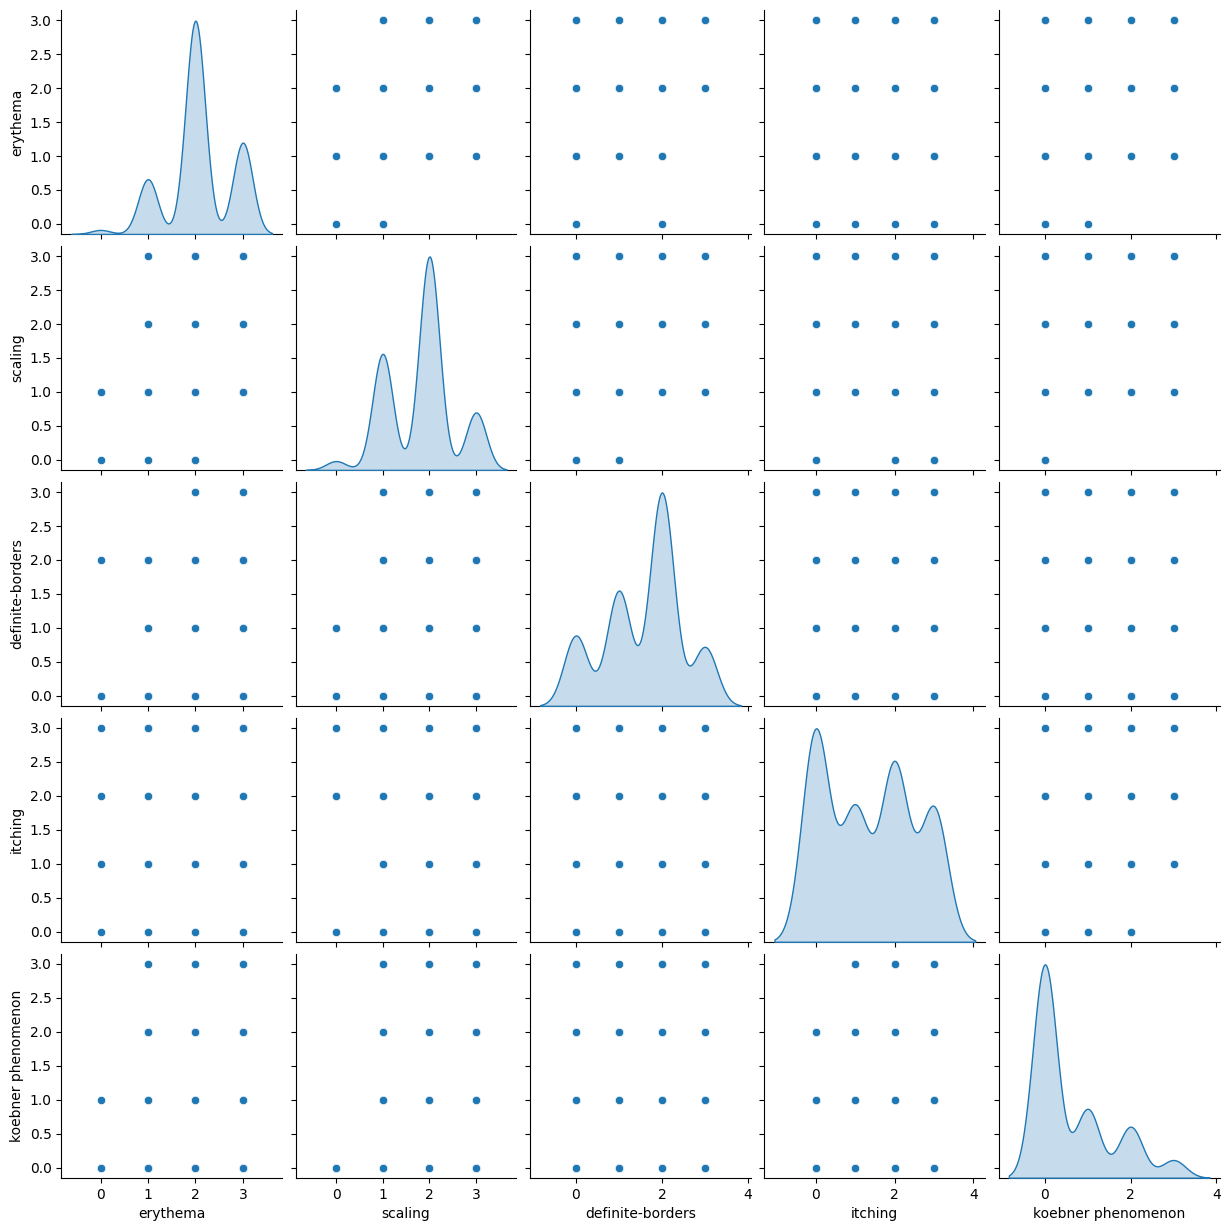

In [40]:
# Lets visualize the data
'''
sns.pairplot(new_dataset[['erythema',
                          'scaling',
                          'definite-borders',
                          'itching',
                          'koebner phenomenon',
                          'polygonal papules',
                          'follicular papules',
                          'oral-mucosal involvement',
                          'knee elbow involvement',
                          'scalp involvement',
                          'family history',
                          'melanin incontinence',
                          'eosinophils in the infiltrate',
                          'pnl infiltrate',
                          'fibrosis of the papillary dermis',
                          'exocytosis',
                          'acanthosis',
                          'hyperkeratosis',
                          'parakeratosis',
                          'clubbing of the rete ridges',
                          'elongation of the rete ridges',
                          'thinning of the suprapapillary epidermis',
                          'spongiform pustule',
                          'munro microabcess',
                          'focal hypergranulosis',
                          'disappearance of the granular layer',
                          'vacuolisation and damage of the basal layer',
                          'spongiosis',
                          'saw-tooth appearance of retes',
                          'follicular horn plug',
                          'perifollicular parakeratosis',
                          'inflammatory monoluclear infiltrate',
                          'band-like infiltrate',
                          'age',
                          'class']], diag_kind="kde")
'''

sns.pairplot(new_dataset[['erythema',
                          'scaling',
                          'definite-borders',
                          'itching',
                          'koebner phenomenon']], diag_kind="kde")

In [48]:
# Splitting dataset into training and testing
train, test = train_test_split(new_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables

# Hint: Make sure you select only numerical variables.
# Feel free to choose the number you want and the dependent variables is class
independent_variables = ['erythema',
                          'scaling',
                          'definite-borders',
                          'itching',
                          'koebner phenomenon',
                          'polygonal papules',
                          'follicular papules',
                          'oral-mucosal involvement',
                          'knee elbow involvement',
                          'scalp involvement',
                          'family history',
                          'melanin incontinence',
                          'eosinophils in the infiltrate',
                          'pnl infiltrate',
                          'fibrosis of the papillary dermis',
                          'exocytosis',
                          'acanthosis',
                          'hyperkeratosis',
                          'parakeratosis',
                          'clubbing of the rete ridges',
                          'elongation of the rete ridges',
                          'thinning of the suprapapillary epidermis',
                          'spongiform pustule',
                          'munro microabcess',
                          'focal hypergranulosis',
                          'disappearance of the granular layer',
                          'vacuolisation and damage of the basal layer',
                          'spongiosis',
                          'saw-tooth appearance of retes',
                          'follicular horn plug',
                          'perifollicular parakeratosis',
                          'inflammatory monoluclear infiltrate',
                          'band-like infiltrate',
                          'age']
dependent_variables = ['class']

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [49]:
train_target, test_target

(     class
 267      6
 250      3
 189      1
 248      1
 149      2
 ..     ...
 304      1
 90       2
 314      3
 137      2
 29       3
 
 [286 rows x 1 columns],
      class
 50       3
 51       4
 290      3
 261      4
 333      5
 ..     ...
 246      1
 39       1
 73       5
 286      2
 335      1
 
 [72 rows x 1 columns])

In [50]:
# NNs can't understand strings, we have to ENCODE them!
train_target = pd.factorize(train_target['class'])[0]
test_target = pd.factorize(test_target['class'])[0]

train_target, test_target

(array([0, 1, 2, 2, 3, 2, 4, 2, 5, 5, 2, 1, 2, 2, 4, 2, 0, 2, 2, 2, 2, 5,
        1, 5, 1, 1, 2, 2, 2, 2, 5, 2, 1, 2, 2, 1, 1, 2, 4, 1, 2, 3, 5, 3,
        5, 5, 3, 5, 4, 3, 3, 1, 1, 5, 2, 2, 3, 4, 2, 2, 3, 0, 5, 5, 4, 3,
        4, 2, 2, 2, 1, 0, 2, 0, 4, 3, 2, 1, 3, 4, 1, 2, 1, 4, 5, 2, 2, 3,
        5, 4, 2, 5, 2, 1, 1, 5, 1, 3, 1, 2, 4, 1, 5, 3, 2, 2, 5, 2, 1, 4,
        2, 3, 4, 2, 1, 2, 4, 3, 5, 0, 5, 4, 5, 5, 3, 2, 3, 4, 1, 5, 4, 3,
        2, 1, 1, 1, 3, 1, 1, 5, 1, 2, 0, 2, 1, 0, 3, 1, 5, 2, 4, 4, 1, 1,
        1, 4, 0, 1, 2, 5, 5, 4, 1, 3, 1, 4, 0, 3, 5, 2, 2, 2, 5, 2, 2, 5,
        2, 2, 2, 4, 3, 1, 4, 0, 2, 4, 3, 1, 0, 2, 3, 2, 2, 1, 2, 0, 2, 2,
        3, 5, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 0, 5, 4, 2, 5, 2, 1, 3, 3, 2,
        0, 3, 1, 3, 5, 3, 4, 2, 1, 4, 2, 2, 2, 5, 3, 4, 2, 5, 4, 4, 4, 3,
        1, 2, 5, 2, 2, 3, 2, 3, 3, 3, 5, 0, 2, 4, 3, 3, 1, 0, 2, 1, 2, 3,
        1, 3, 2, 5, 2, 2, 1, 2, 4, 2, 1, 2, 5, 3, 4, 2, 0, 2, 3, 1, 3, 1]),
 array([0, 1, 0, 1, 2, 0, 3, 1, 0, 3

In [52]:
# Build your model!
model = tf.keras.models.Sequential([
          tf.keras.layers.InputLayer(shape=(len(independent_variables), )),
          tf.keras.layers.Dense(units=64, activation='relu'),
          tf.keras.layers.Dense(units=32, activation='relu'),
          tf.keras.layers.Dense(units=6, activation='softmax')
        ])
# Hint: Is this a binary or multiclassification problem?
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Now compile the model!
model.fit(train_set,
          train_target,
          epochs=50,
          batch_size = 8,
          validation_split=0.1
          )

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1726 - loss: 6.4573 - val_accuracy: 0.4828 - val_loss: 1.7356
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4717 - loss: 1.4670 - val_accuracy: 0.7586 - val_loss: 0.9806
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7078 - loss: 1.0420 - val_accuracy: 0.8276 - val_loss: 0.8072
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7533 - loss: 0.8347 - val_accuracy: 0.8621 - val_loss: 0.6009
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8782 - loss: 0.5816 - val_accuracy: 0.9655 - val_loss: 0.4399
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9292 - loss: 0.4956 - val_accuracy: 0.9655 - val_loss: 0.3326
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9360 - loss: 0.3919 - val_accuracy: 1.0000 - val_loss: 0.2700
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9416 - loss: 0.3327 - val_accuracy: 1.0000 - val_loss

In [30]:
# Evaluate your model
model.evaluate(x=test_set, y=test_target, batch_size=8)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4004 - loss: 8.7179 


[8.670124053955078, 0.3888888955116272]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


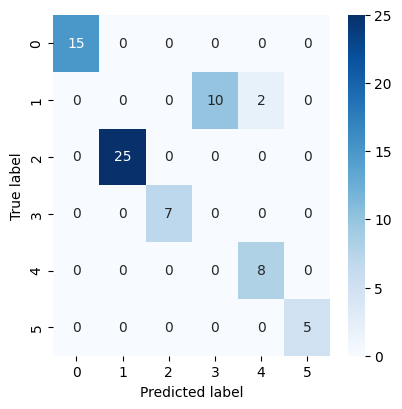

In [31]:
# Function that plots confusion matrix
def plot_confusion_matrix(labels, predictions):
  figure = plt.figure(figsize=(4, 4))
  sns.heatmap(confusion_matrix(labels=labels, predictions=predictions), annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Confusion Matrix
predictions = list(map(lambda x: np.argmax(x), model.predict(test_set)))

plot_confusion_matrix(labels=test_target, predictions=predictions)